`(xdpyinfo | grep dimensions)` reveals 

Resolution: 2560×1440    Size: 602×341mm 

In [ ]:
# default_exp summary_image

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
def mm2px(mm):
    return int(2560/592*mm) #by trail-n-error using a ruler

def tex_t(ctx, x, y, font_size, text):
    adjusted_font = font_size/5.683 #Derived from trial-n-error but 1440×341/864 = 568.3
    ctx.select_font_face("Noto", cairo.FontSlant.NORMAL, cairo.FontWeight.NORMAL)
    ctx.set_font_size(adjusted_font)
    ctx.move_to(x,y)
    ctx.show_text(text)

def normal_text(x,y,text):
    return tex_t(ctx, x, y, 5, text)
# Create a text box which has a title, takes a list of string, then dispays those elements as bulleted
# points with a set amount of space. Also width constraints, so the text is wrapped after certain width.
def text_box(x, y, title, tasks, width, font_size):
    x, y = x, y
    title_size = font_size + 8
    tex_t(ctx, x-2, y, title_size, title)
    y += 5
    wrap = lambda text: textwrap.wrap(text, width=width, 
                                      initial_indent="\u2022 ", #bullet
                                      subsequent_indent="   ")
    for i in tasks:
        for j, each_line in enumerate(wrap(i)):
            tex_t(ctx, x-3, y+j*3, font_size = 10, text=each_line)
        y+=3+j*3
    return y

distraction_box = text_box(7,15,"Distractions", distractions, width=45, font_size=10)


In [ ]:
distractions = ['The bullet symbol may take any of a variety of shapes',
                'Such as circular, square, diamond or arrow.',
                'Lists made with bullets are called bulleted lists. The HTML element name for a bulleted list is unordered list ',
                #'12345678901234567890123456789012345678901234567890'
               ]
f'\u00d7'

'×'

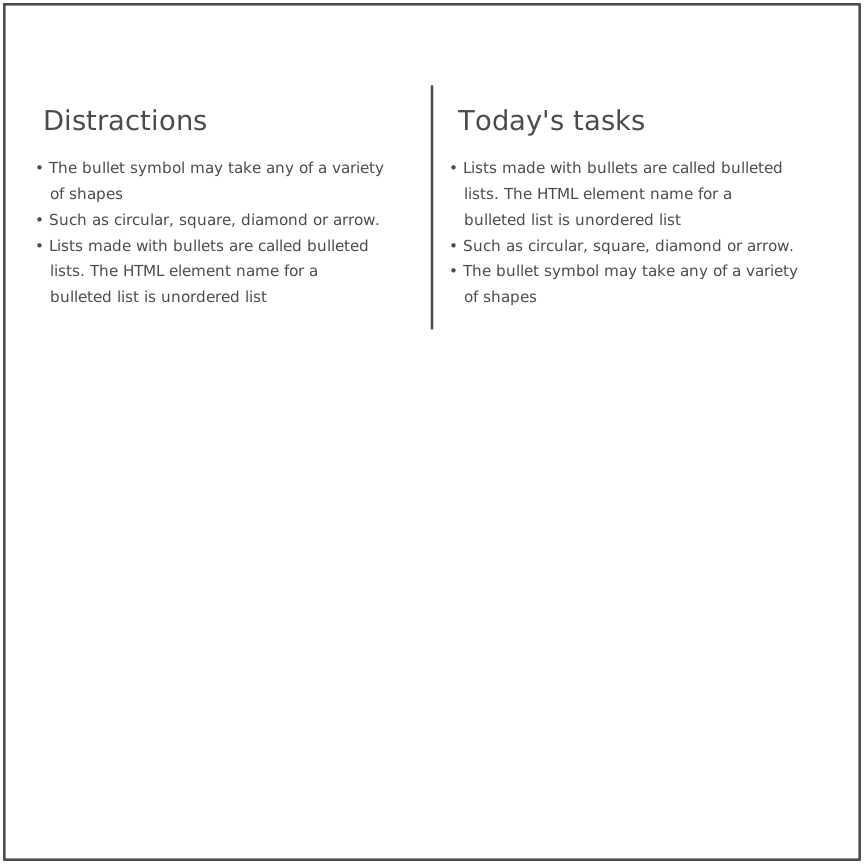

In [ ]:
import textwrap
from math import pi, ceil
import cairo
WIDTH, HEIGHT = 200, 200 #mm
px_width, px_height = mm2px(WIDTH), mm2px(HEIGHT)
convinient_scale = 100
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, px_width, px_height)
ctx = cairo.Context(surface)
ctx.scale(px_width/convinient_scale, px_height/convinient_scale*(WIDTH/HEIGHT))
ctx.set_source_rgba(0,0,0,0.7)

#Line settings
ctx.set_line_width(0.30)
ctx.set_line_join(cairo.LineJoin.ROUND)
ctx.rectangle(0.5,0.5,99,99)
ctx.stroke()


#tex_t(ctx, 25, 75,font_size=54, text="HH") 

# Text Boxes
distraction_box = text_box(7,15,"Distractions", distractions, width=45, font_size=10)
todo_box = text_box(55,15,"Today's tasks", distractions[::-1], width=45, font_size=10)

# Lines
ctx.move_to(50,10) #line start
ctx.set_line_width(0.3)
ctx.set_line_cap(cairo.LineJoin.ROUND)
ctx.line_to(50,todo_box) #line end
ctx.stroke()

surface.write_to_png("example.png")  # Output to PNG

from IPython.display import Image
cairo.FontOptions()
Image(filename='example.png',retina=True
     ) #retina makes image display size to half

In [ ]:
distractions[::-1]

int